In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import gc

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [16]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [17]:
new_train_data = pd.concat([train_data, test_data])

In [4]:
new_train_data.shape

(1309, 12)

In [5]:
new_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
new_train_data = new_train_data.drop(['Name', 'Ticket'], axis=1)

In [19]:
new_train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1.0,1,female,38.0,1,0,71.2833,C85,C
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,4,1.0,1,female,35.0,1,0,53.1000,C123,S
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,NaN,0,0,8.0500,NaN,S
414,1306,NaN,1,female,39.0,0,0,108.9000,C105,C
415,1307,NaN,3,male,38.5,0,0,7.2500,NaN,S
416,1308,NaN,3,male,NaN,0,0,8.0500,NaN,S


In [55]:
new_train_data['Cabin'] = new_train_data['Cabin'].fillna(-1)

In [59]:
cabin_col = new_train_data['Cabin'].tolist()

for i in range(len(cabin_col)):
    if cabin_col[i] != -1:
        cabin_col[i] = cabin_col[i][0]

cabin_col

[-1,
 'C',
 -1,
 'C',
 -1,
 -1,
 'E',
 -1,
 -1,
 -1,
 'G',
 'C',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 'D',
 -1,
 'A',
 -1,
 -1,
 -1,
 'C',
 -1,
 -1,
 -1,
 'B',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 'D',
 -1,
 'B',
 'C',
 -1,
 -1,
 -1,
 -1,
 -1,
 'B',
 'C',
 -1,
 -1,
 -1,
 'F',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 'F',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 'C',
 -1,
 -1,
 -1,
 'E',
 -1,
 -1,
 -1,
 'A',
 'D',
 -1,
 -1,
 -1,
 -1,
 'D',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 'C',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 'B',
 -1,
 -1,
 -1,
 -1,
 'E',
 'D',
 -1,
 -1,
 -1,
 'F',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 'D',
 'C',
 -1,
 'B',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 'F',
 -1,
 -1,
 'C',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 'E',
 -1,
 -1,
 -1,
 'B',
 -1,
 -1,
 -1,
 'A',
 -1,
 -1,
 'C',
 -1,
 -1,
 -1,
 -1,
 -1,
 'F',
 -1,
 'A',
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1

In [62]:
new_train_data['Cabin'] = cabin_col

In [63]:
object_columns = new_train_data.dtypes[new_train_data.dtypes == 'object'].index.tolist()

for column in object_columns:
    new_train_data[column] = pd.factorize(new_train_data[column])[0]

In [64]:
new_train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,0,22.0,1,0,7.2500,0,0
1,2,1.0,1,1,38.0,1,0,71.2833,1,1
2,3,1.0,3,1,26.0,0,0,7.9250,0,0
3,4,1.0,1,1,35.0,1,0,53.1000,1,0
4,5,0.0,3,0,35.0,0,0,8.0500,0,0
5,6,0.0,3,0,NaN,0,0,8.4583,0,2
6,7,0.0,1,0,54.0,0,0,51.8625,2,0
7,8,0.0,3,0,2.0,3,1,21.0750,0,0
8,9,1.0,3,1,27.0,0,2,11.1333,0,0
9,10,1.0,2,1,14.0,1,0,30.0708,0,1


In [73]:
new_train_data['Cabin'].value_counts()

0    1014
1      94
6      65
4      46
2      41
5      22
7      21
3       5
8       1
Name: Cabin, dtype: int64

In [65]:
new_train_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Cabin            0
Embarked         0
dtype: int64

In [66]:
new_train_data = new_train_data.fillna(-999)

In [67]:
train_data = new_train_data[new_train_data['Survived'] != -999]
test_data = new_train_data[new_train_data['Survived'] == -999]
train_data.shape, test_data.shape

((891, 10), (418, 10))

In [68]:
test_data = test_data.drop('Survived', axis = 1, inplace=False)
test_data.shape

(418, 9)

In [69]:
ftr_train = train_data.drop(['PassengerId', 'Survived'], axis=1, inplace=False)
survived_train = train_data['Survived']

In [70]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_train, survived_train, test_size=0.3, random_state=2022)
train_x.shape, valid_x.shape

((623, 8), (268, 8))

In [71]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    n_jobs = -1,
    n_estimators = 1000,
    learning_rate = 0.02,
    num_leaves = 32,
    subsample = 0.8,
    max_depth = 12
)

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric='auc',
       verbose=20, early_stopping_rounds=50)

/Users/dongin-jang/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dongin-jang/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's auc: 0.910767	training's binary_logloss: 0.527307	valid_1's auc: 0.863185	valid_1's binary_logloss: 0.54303
[40]	training's auc: 0.917795	training's binary_logloss: 0.452642	valid_1's auc: 0.875446	valid_1's binary_logloss: 0.482283
[60]	training's auc: 0.922578	training's binary_logloss: 0.404482	valid_1's auc: 0.873869	valid_1's binary_logloss: 0.447842
[80]	training's auc: 0.92754	training's binary_logloss: 0.373486	valid_1's auc: 0.875446	valid_1's binary_logloss: 0.42864


LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, subsample=0.8)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

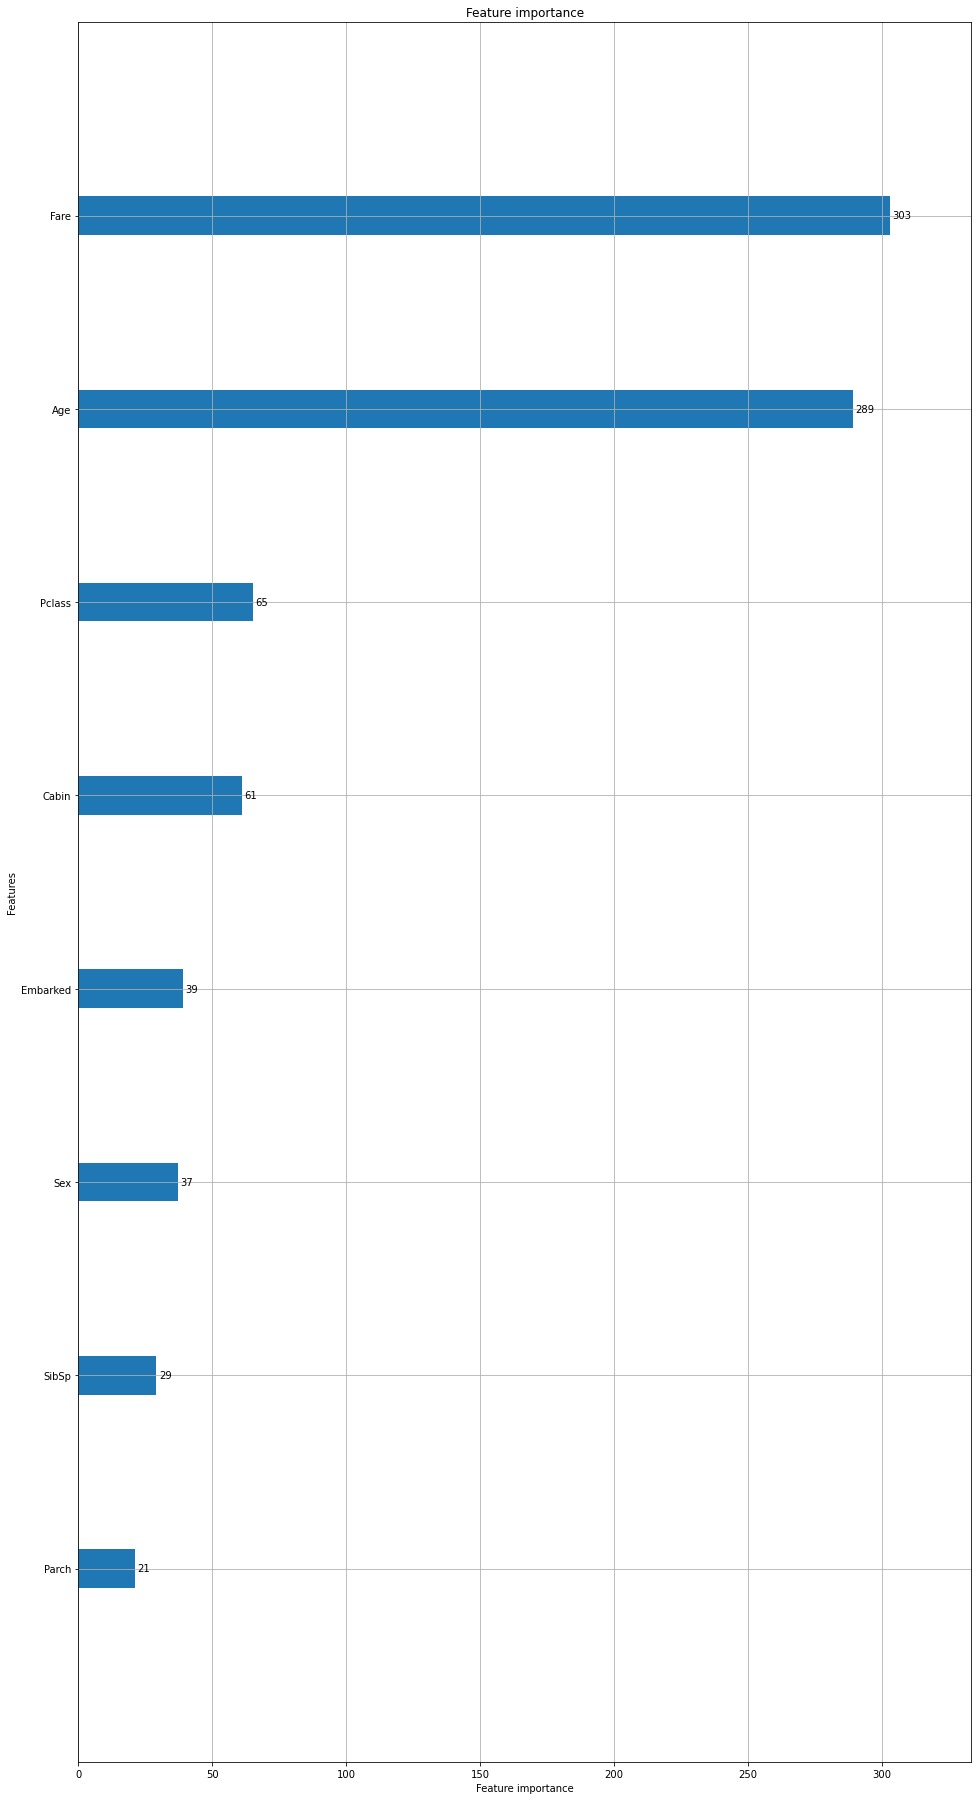

In [72]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))